In [1]:
# import basic libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the data
data = pd.read_csv('Wholesale-customers-data.csv')
data = data.drop(["Channel", "Region"], axis=1)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


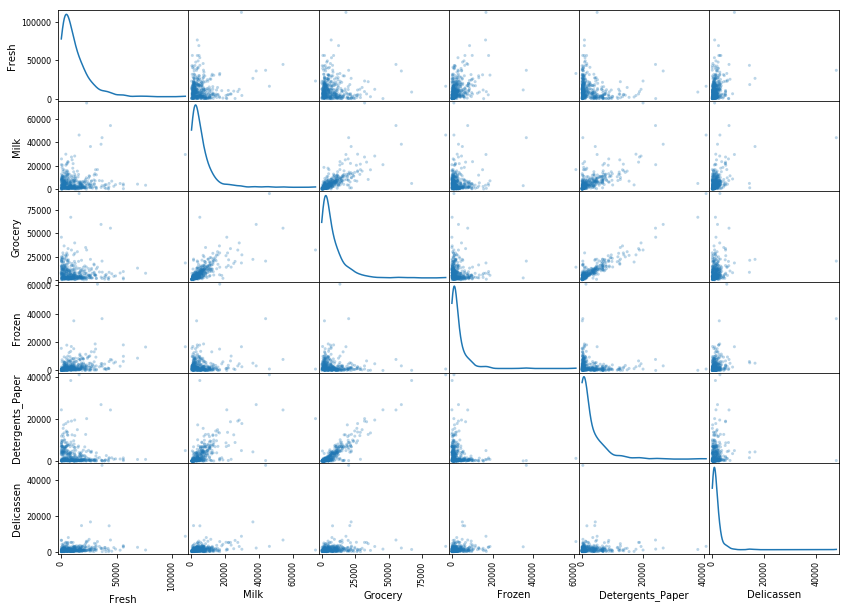

In [3]:
# producing a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal='kde');
plt.show()

From the above scatter-plots, it seems there is a linear relationship between the spending habits of milk, grocery and detergents_paper items. Also, there might be a linear relationship between spending habits on fresh and frozen products. Let’s now try to analyze the dataset by creating six principal components

In [4]:
# scaling the data before PCA
from sklearn.preprocessing import scale
data = pd.DataFrame(scale(data), columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [5]:
# implementing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

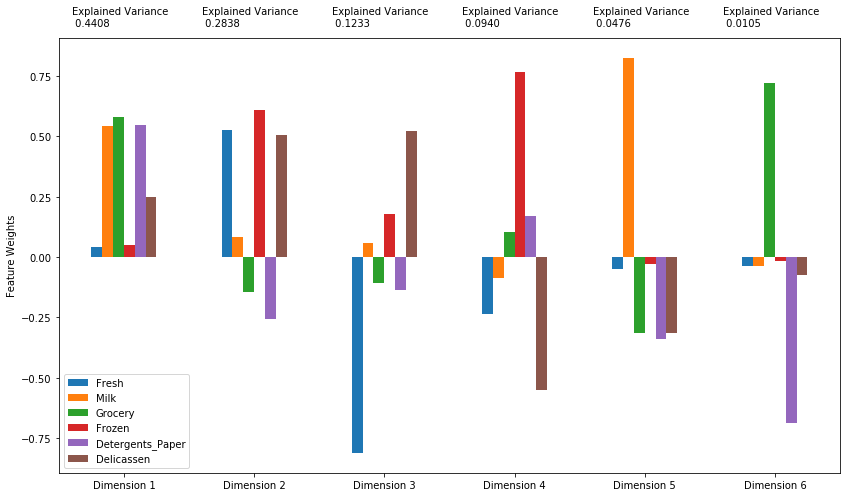

In [6]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [7]:
pca_results.cumsum()

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Dimension 1,0.4408,0.0429,0.5451,0.5793,0.0512,0.5486,0.2487
Dimension 2,0.7246,0.5708,0.6283,0.4332,0.6625,0.2934,0.7529
Dimension 3,0.8479,-0.2415,0.6887,0.3248,0.8409,0.1572,1.2768
Dimension 4,0.9419,-0.4782,0.6015,0.4308,1.6096,0.3289,0.7247
Dimension 5,0.9895,-0.5269,1.4281,0.1158,1.5817,-0.0107,0.4100
Dimension 6,1.0000,-0.5629,1.3901,0.8375,1.5661,-0.6966,0.3349


From the above table, we can see that first four components together explains 94.19% variance in the data. But getting to know how many principal components should we use is a very important step in an analysis. To help us select a number of principal components we use what is known as scree plot. This plot shows cumulative explained variance on y-axis and number of principal components on the x-axis. As a rule of thumb, our focus is to get an elbow in the plot. The number of principal components where we get the elbow is the optimal number of components that we should select for our analysis. Let’s now try to plot the scree plot in our case.

From the below plot we can observe that we got that elbow in the plot corresponding to the 2nd number of principal components. Hence we should use only two number of principal components in our analysis.

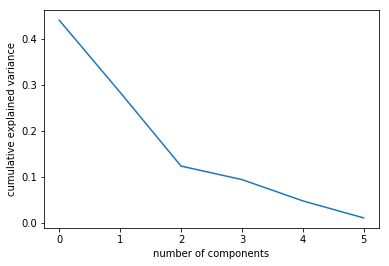

In [8]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [9]:
# creating a biplot

pca = PCA(n_components=3).fit(data)
reduced_data = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2', 'Dimension 3'])

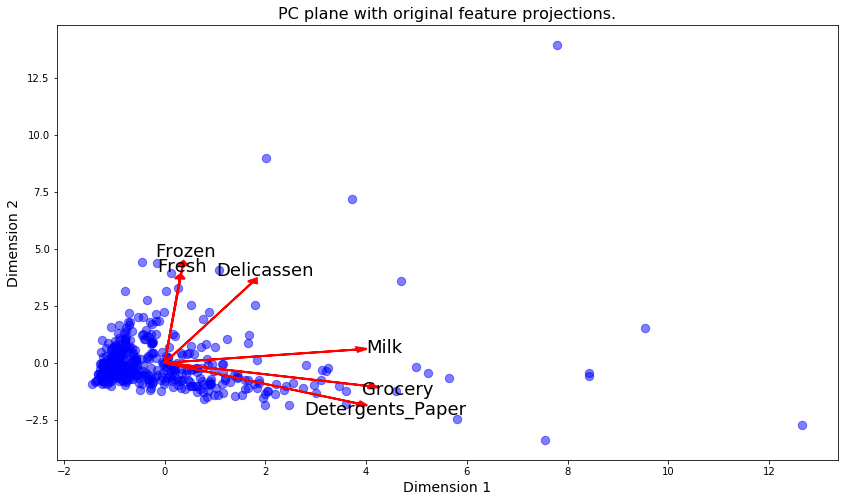

In [10]:
def biplot(reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

biplot(reduced_data, pca)
plt.show()